In [1]:
import pandas as pd

In [2]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', error_bad_lines=False)

b'Skipping line 124084: expected 12 fields, saw 13\nSkipping line 124809: expected 12 fields, saw 13\n'


In [3]:
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [4]:
accre.shape

(336950, 12)

In [5]:
accre['USEDTIME'].value_counts()

00:00:00      51083
00:00:07      19788
00:00:08      11147
00:00:09       6900
00:00:06       5785
              ...  
11:42:55          1
1-03:38:42        1
1-02:05:30        1
05:16:34          1
2-10:05:46        1
Name: USEDTIME, Length: 20818, dtype: int64

In [6]:
accre.dtypes

JOBID        object
ACCOUNT      object
USER         object
USEDMEM      object
REQTIME      object
USEDTIME     object
NODES         int64
CPUS          int64
GPUS          int64
PARTITION    object
EXITCODE     object
STATE        object
dtype: object

In [7]:
accre.USEDTIME = accre.USEDTIME.str.replace('-','days ',regex=True)

In [8]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED


In [9]:
accre['USEDTIMEtd'] = pd.to_timedelta(accre['USEDTIME'])

In [10]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10


In [11]:
accre['USEDTIMEtd'].dt.total_seconds()

0           793.0
1            22.0
2           537.0
3         18586.0
4         15070.0
           ...   
336945      427.0
336946        0.0
336947        0.0
336948       86.0
336949        0.0
Name: USEDTIMEtd, Length: 336950, dtype: float64

In [12]:
accre['usedtime_seconds'] = accre['USEDTIMEtd'].dt.total_seconds()

In [13]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0


In [14]:
accre.tail()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING,0 days 00:07:07,427.0
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,0 days 00:01:26,86.0
336949,46754618,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0


In [15]:
accre_filtered = accre[accre['usedtime_seconds'] != 0.0]

In [16]:
accre_filtered = accre[accre['STATE'] == 'COMPLETED']

In [17]:
accre_filtered.shape

(283333, 14)

In [18]:
accre_filtered.tail()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
336933,46753813,harovin,shannon,137.96M,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,0 days 00:00:52,52.0
336934,46753820_26,harovin,porsha,5093.70M,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,0 days 00:34:51,2091.0
336936,46753823,harovin,shannon,156.21M,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,0 days 00:04:03,243.0
336942,46754095,harovin,shannon,2820.52M,5-00:00:00,00:11:13,1,1,1,turing,0:0,COMPLETED,0 days 00:11:13,673.0
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,0 days 00:01:26,86.0


In [19]:
accre_filtered.USEDMEM= accre_filtered.USEDMEM.str.replace('M','',regex=True)

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
accre_filtered.head()


,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0


In [21]:
accre_filtered.dtypes

JOBID                        object
ACCOUNT                      object
USER                         object
USEDMEM                      object
REQTIME                      object
USEDTIME                     object
NODES                         int64
CPUS                          int64
GPUS                          int64
PARTITION                    object
EXITCODE                     object
STATE                        object
USEDTIMEtd          timedelta64[ns]
usedtime_seconds            float64
dtype: object

In [22]:
accre_filtered.USEDMEM = accre_filtered['USEDMEM'].str.strip()

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
accre_filtered = accre_filtered.astype({"USEDMEM":'float'})

In [25]:
#per gpu usage = memory/gpu
#runtime weighted = gpu * seconds used
#memory * seconds

In [26]:
accre_filtered['memory_per_gpu'] = accre_filtered['USEDMEM']/accre_filtered['GPUS']

In [27]:
accre_filtered['weight'] = accre_filtered['GPUS'] * accre_filtered['usedtime_seconds'] 

In [28]:
accre_filtered['weighted_memory_gpu'] = accre_filtered['memory_per_gpu'] * accre_filtered['weight']

In [29]:
accre_filtered.head(5)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0,18.66,793.0,14797.38
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0,0.00,22.0,0.00
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0,402.32,537.0,216045.84
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0,417.62,18586.0,7761885.32
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0,450.09,15070.0,6782856.30


In [30]:
accre_filtered = accre_filtered[accre_filtered['memory_per_gpu'] != 0.0]

In [31]:
accre_filtered = accre_filtered.sort_values(['PARTITION', 'memory_per_gpu'])

In [32]:
accre_filtered.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu
57704,35317072,clara,suzanna,0.01,4-23:59:00,5days 00:00:04,1,3,1,maxwell,0:0,COMPLETED,5 days 00:00:04,432004.0,0.0100,432004.0,4320.04
81792,40850031,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,0.0525,320.0,16.80
81793,40850186,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,0.0525,336.0,17.64
81794,40850269,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,0.0525,320.0,16.80
81795,40850643,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,0.0525,336.0,17.64


In [33]:
accre_filtered['cumulative_weight'] = accre_filtered.groupby('PARTITION')['weight'].cumsum()

In [34]:
accre_filtered.groupby('PARTITION')['weight'].transform('sum')

57704     331264074.0
81792     331264074.0
81793     331264074.0
81794     331264074.0
81795     331264074.0
             ...     
114682    733909501.0
114661    733909501.0
59980     733909501.0
114656    733909501.0
335056    733909501.0
Name: weight, Length: 277475, dtype: float64

In [35]:
accre_filtered['cumulative_percentage'] = accre_filtered['cumulative_weight']/accre_filtered.groupby('PARTITION')['weight'].transform('sum')

In [36]:
percentile = 0.80

accre_filtered.loc[accre_filtered['cumulative_percentage'] >= percentile].groupby('PARTITION').head(1)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu,cumulative_weight,cumulative_percentage
303821,45214650_122,glasshouse,collins,5976.50,5-00:00:00,02:36:34,1,1,1,maxwell,0:0,COMPLETED,0 days 02:36:34,9394.0,5976.50,9394.0,5.614324e+07,265015082.0,0.800012
131002,43136167,glasshouse,mel,31891.84,3-08:00:00,16:56:49,1,7,8,pascal,0:0,COMPLETED,0 days 16:56:49,61009.0,3986.48,488072.0,1.945689e+09,961161782.0,0.800016
87296,41603210_22,harovin,porsha,11660.97,5-00:00:00,4days 21:32:50,1,5,1,turing,0:0,COMPLETED,4 days 21:32:50,423170.0,11660.97,423170.0,4.934573e+09,587362977.0,0.800321


In [37]:
import seaborn as sns

In [39]:
import matplotlib.pyplot as plt

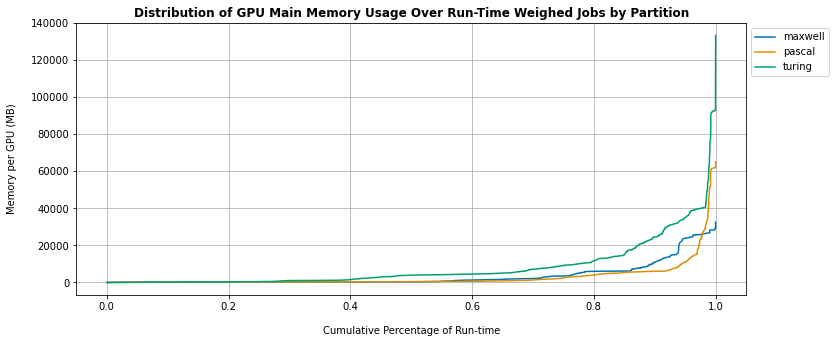

In [40]:
plt.figure(figsize = (12,5))
sns.lineplot(data = accre_filtered, x='cumulative_percentage', y= 'memory_per_gpu', hue='PARTITION', palette = 'colorblind')
plt.title('Distribution of GPU Main Memory Usage Over Run-Time Weighed Jobs by Partition', fontweight = 'bold')
plt.xlabel("Cumulative Percentage of Run-time", labelpad=14)
plt.ylabel("Memory per GPU (MB)", labelpad=14)
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.savefig('../accre_project_jolly_ranchers.png', dpi = 150);

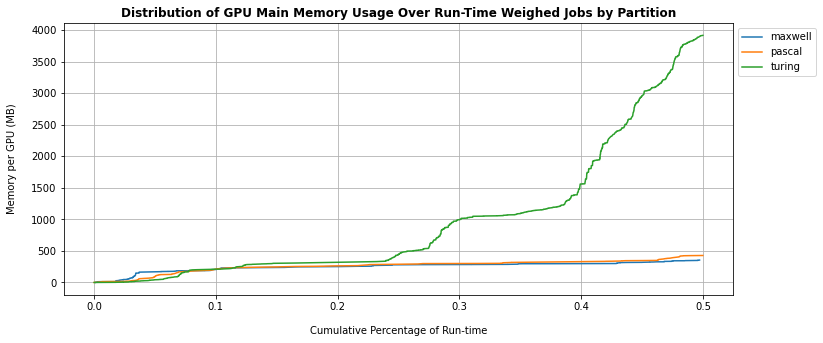

In [42]:
plt.figure(figsize = (12,5))
sns.lineplot(data = accre_filtered[accre_filtered['cumulative_percentage'] <= 0.5], x='cumulative_percentage', y= 'memory_per_gpu', hue='PARTITION')
plt.xlabel("Cumulative Percentage of Run-time", labelpad=14)
plt.ylabel("Memory per GPU (MB)", labelpad=14)
plt.title('Distribution of GPU Main Memory Usage Over Run-Time Weighed Jobs by Partition', fontweight = 'bold')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));
plt.savefig('../accre_project_jolly_ranchers.png', dpi = 150);

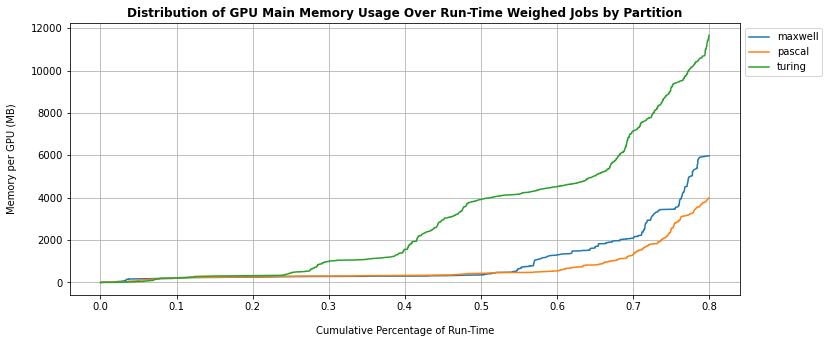

In [44]:
plt.figure(figsize = (12,5))
sns.lineplot(data = accre_filtered[accre_filtered['cumulative_percentage'] <= 0.8], x='cumulative_percentage', y= 'memory_per_gpu', hue='PARTITION')
plt.xlabel("Cumulative Percentage of Run-Time", labelpad=14)
plt.ylabel("Memory per GPU (MB)", labelpad=14)
plt.title('Distribution of GPU Main Memory Usage Over Run-Time Weighed Jobs by Partition', fontweight = 'bold')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.savefig('../accre_project_jolly_ranchers.png', dpi = 150);

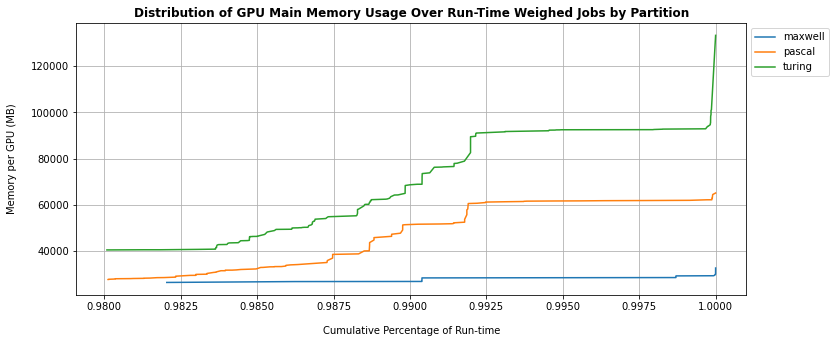

In [45]:
plt.figure(figsize = (12,5))
sns.lineplot(data = accre_filtered[accre_filtered['cumulative_percentage'] >= 0.98], x='cumulative_percentage', y= 'memory_per_gpu', hue='PARTITION')
plt.xlabel("Cumulative Percentage of Run-time", labelpad=14)
plt.ylabel("Memory per GPU (MB)", labelpad=14)
plt.title('Distribution of GPU Main Memory Usage Over Run-Time Weighed Jobs by Partition', fontweight = 'bold')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.savefig('../accre_project_jolly_ranchers.png', dpi = 150);

In [46]:
percentile = 0.80

accre80 = accre_filtered.loc[accre_filtered['cumulative_percentage'] >= percentile].groupby('PARTITION').head(1)
accre80

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu,cumulative_weight,cumulative_percentage
303821,45214650_122,glasshouse,collins,5976.50,5-00:00:00,02:36:34,1,1,1,maxwell,0:0,COMPLETED,0 days 02:36:34,9394.0,5976.50,9394.0,5.614324e+07,265015082.0,0.800012
131002,43136167,glasshouse,mel,31891.84,3-08:00:00,16:56:49,1,7,8,pascal,0:0,COMPLETED,0 days 16:56:49,61009.0,3986.48,488072.0,1.945689e+09,961161782.0,0.800016
87296,41603210_22,harovin,porsha,11660.97,5-00:00:00,4days 21:32:50,1,5,1,turing,0:0,COMPLETED,4 days 21:32:50,423170.0,11660.97,423170.0,4.934573e+09,587362977.0,0.800321


In [47]:
import seaborn as sns

In [48]:
# what is total runtime of jobs using x (1,2,3,etc) gpus per partition. groupby. out of total runtime on partition, what is % of time used by gpu. x number of seconds on 1 gpu....

In [49]:
total_time_partition = accre_filtered.groupby('PARTITION')['usedtime_seconds'].sum()
total_time_partition

PARTITION
maxwell    220662001.0
pascal     827347381.0
turing     546872782.0
Name: usedtime_seconds, dtype: float64

In [50]:
total_time_gpu = accre_filtered.groupby(['PARTITION', 'GPUS'])['usedtime_seconds'].sum()
total_time_gpu

PARTITION  GPUS
maxwell    1       193112958.0
           2         1173864.0
           3          162730.0
           4        21658370.0
           6          764727.0
           8          818384.0
           12        2570745.0
           16         349680.0
           18          18436.0
           24          32104.0
           40              3.0
pascal     1       715704548.0
           2        33523802.0
           3          820803.0
           4        65926538.0
           8         4718006.0
           12          16315.0
           16        5671219.0
           24         886127.0
           32          80018.0
           60              5.0
turing     1       477885316.0
           2        17286806.0
           3         3374519.0
           4        44319772.0
           8         3757347.0
           12             66.0
           16         248745.0
           40            211.0
Name: usedtime_seconds, dtype: float64

In [51]:
type(total_time_gpu)

pandas.core.series.Series

In [52]:
question2 = total_time_gpu.to_frame()
question2

usedtime_seconds
PARTITION GPUS                  
maxwell   1          193112958.0
          2            1173864.0
          3             162730.0
          4           21658370.0
          6             764727.0
          8             818384.0
          12           2570745.0
          16            349680.0
          18             18436.0
          24             32104.0
          40                 3.0
pascal    1          715704548.0
          2           33523802.0
          3             820803.0
          4           65926538.0
          8            4718006.0
          12             16315.0
          16           5671219.0
          24            886127.0
          32             80018.0
          60                 5.0
turing    1          477885316.0
          2           17286806.0
          3            3374519.0
          4           44319772.0
          8            3757347.0
          12                66.0
          16            248745.0
          40               211.0

In [53]:
question2.groupby('PARTITION')['usedtime_seconds'].sum()

PARTITION
maxwell    220662001.0
pascal     827347381.0
turing     546872782.0
Name: usedtime_seconds, dtype: float64

In [54]:
question2 = question2.reset_index()

In [55]:
question2['total_partition_time'] = question2.groupby('PARTITION')['usedtime_seconds'].transform('sum')
question2

,PARTITION,GPUS,usedtime_seconds,total_partition_time
0,maxwell,1,193112958.0,220662001.0
1,maxwell,2,1173864.0,220662001.0
2,maxwell,3,162730.0,220662001.0
3,maxwell,4,21658370.0,220662001.0
4,maxwell,6,764727.0,220662001.0
5,maxwell,8,818384.0,220662001.0
6,maxwell,12,2570745.0,220662001.0
7,maxwell,16,349680.0,220662001.0
8,maxwell,18,18436.0,220662001.0
9,maxwell,24,32104.0,220662001.0


In [56]:
question2 = question2.reset_index()

In [57]:
question2['gpu_time%_bypartition'] = question2['usedtime_seconds']/question2['total_partition_time']
question2

,index,PARTITION,GPUS,usedtime_seconds,total_partition_time,gpu_time%_bypartition
0,0,maxwell,1,193112958.0,220662001.0,8.751528e-01
1,1,maxwell,2,1173864.0,220662001.0,5.319738e-03
2,2,maxwell,3,162730.0,220662001.0,7.374627e-04
3,3,maxwell,4,21658370.0,220662001.0,9.815179e-02
4,4,maxwell,6,764727.0,220662001.0,3.465603e-03
5,5,maxwell,8,818384.0,220662001.0,3.708767e-03
6,6,maxwell,12,2570745.0,220662001.0,1.165015e-02
7,7,maxwell,16,349680.0,220662001.0,1.584686e-03
8,8,maxwell,18,18436.0,220662001.0,8.354859e-05
9,9,maxwell,24,32104.0,220662001.0,1.454895e-04


In [58]:
question2['gpu_time'] = question2['GPUS'] * question2['usedtime_seconds']
question2['total_partition_gpu_time'] = question2.groupby('PARTITION')['gpu_time'].transform('sum')
question2

,index,PARTITION,GPUS,usedtime_seconds,total_partition_time,gpu_time%_bypartition,gpu_time,total_partition_gpu_time
0,0,maxwell,1,193112958.0,220662001.0,8.751528e-01,193112958.0,3.312641e+08
1,1,maxwell,2,1173864.0,220662001.0,5.319738e-03,2347728.0,3.312641e+08
2,2,maxwell,3,162730.0,220662001.0,7.374627e-04,488190.0,3.312641e+08
3,3,maxwell,4,21658370.0,220662001.0,9.815179e-02,86633480.0,3.312641e+08
4,4,maxwell,6,764727.0,220662001.0,3.465603e-03,4588362.0,3.312641e+08
5,5,maxwell,8,818384.0,220662001.0,3.708767e-03,6547072.0,3.312641e+08
6,6,maxwell,12,2570745.0,220662001.0,1.165015e-02,30848940.0,3.312641e+08
7,7,maxwell,16,349680.0,220662001.0,1.584686e-03,5594880.0,3.312641e+08
8,8,maxwell,18,18436.0,220662001.0,8.354859e-05,331848.0,3.312641e+08
9,9,maxwell,24,32104.0,220662001.0,1.454895e-04,770496.0,3.312641e+08


In [59]:
question2['morethan4gpu'] = question2['gpu_time']/question2['total_partition_gpu_time']
question2

,index,PARTITION,GPUS,usedtime_seconds,total_partition_time,gpu_time%_bypartition,gpu_time,total_partition_gpu_time,morethan4gpu
0,0,maxwell,1,193112958.0,220662001.0,8.751528e-01,193112958.0,3.312641e+08,5.829577e-01
1,1,maxwell,2,1173864.0,220662001.0,5.319738e-03,2347728.0,3.312641e+08,7.087180e-03
2,2,maxwell,3,162730.0,220662001.0,7.374627e-04,488190.0,3.312641e+08,1.473719e-03
3,3,maxwell,4,21658370.0,220662001.0,9.815179e-02,86633480.0,3.312641e+08,2.615239e-01
4,4,maxwell,6,764727.0,220662001.0,3.465603e-03,4588362.0,3.312641e+08,1.385107e-02
5,5,maxwell,8,818384.0,220662001.0,3.708767e-03,6547072.0,3.312641e+08,1.976391e-02
6,6,maxwell,12,2570745.0,220662001.0,1.165015e-02,30848940.0,3.312641e+08,9.312492e-02
7,7,maxwell,16,349680.0,220662001.0,1.584686e-03,5594880.0,3.312641e+08,1.688949e-02
8,8,maxwell,18,18436.0,220662001.0,8.354859e-05,331848.0,3.312641e+08,1.001763e-03
9,9,maxwell,24,32104.0,220662001.0,1.454895e-04,770496.0,3.312641e+08,2.325927e-03


In [60]:
question2 = question2.reset_index()

In [61]:
fourgpu = accre_filtered[accre_filtered['GPUS'] > 4]
fourgpu

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu,cumulative_weight,cumulative_percentage
81792,40850031,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,0.05250,320.0,1.680000e+01,432324.0,0.001305
81793,40850186,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,0.05250,336.0,1.764000e+01,432660.0,0.001306
81794,40850269,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,0.05250,320.0,1.680000e+01,432980.0,0.001307
81795,40850643,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,0.05250,336.0,1.764000e+01,433316.0,0.001308
81796,40851447,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,0.05250,320.0,1.680000e+01,433636.0,0.001309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334783,46529339,glasshouse,lea,60625.11,3-18:00:00,03:35:01,1,6,8,turing,0:0,COMPLETED,0 days 03:35:01,12901.0,7578.13875,103208.0,7.821245e+08,522773800.0,0.712314
332784,46293023,glasshouse,lea,61405.85,3-18:00:00,02:35:16,1,6,8,turing,0:0,COMPLETED,0 days 02:35:16,9316.0,7675.73125,74528.0,5.720569e+08,526739672.0,0.717717
331122,45895490,glasshouse,lea,75298.25,3-18:00:00,20:28:54,1,6,8,turing,0:0,COMPLETED,0 days 20:28:54,73734.0,9412.28125,589872.0,5.552041e+09,555310613.0,0.756647
81529,40828024,glasshouse,tommie,168349.86,3-18:00:00,02:50:36,1,20,8,turing,0:0,COMPLETED,0 days 02:50:36,10236.0,21043.73250,81888.0,1.723229e+09,644387319.0,0.878020


In [65]:
fourgpu.groupby('PARTITION')['USER'].value_counts()
#four_gpu_users.to_frame()
#four_gpu_users

PARTITION  USER    
maxwell    collier      86
           arlyne       48
           lea          44
           mel          32
           tommie       31
           jones        16
           bridgett      4
           tamara        3
           dola          2
pascal     mel         180
           lea         129
           arlyne       40
           bridgett     33
           jones        29
           tommie       15
           treva         9
           collier       6
           dola          2
turing     tommie       66
           mel          58
           lea          21
           cleva        12
           collier       7
           jones         6
           dola          3
           benedict      1
           eldora        1
           jerrad        1
Name: USER, dtype: int64

<AxesSubplot:xlabel='GPUS', ylabel='gpu_time%_bypartition'>

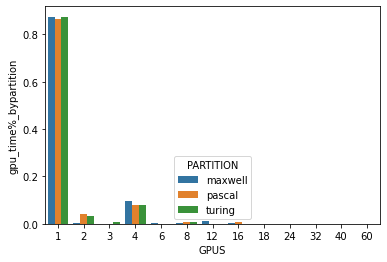

In [66]:
sns.barplot(data = question2, x='GPUS', y='gpu_time%_bypartition', hue= 'PARTITION')

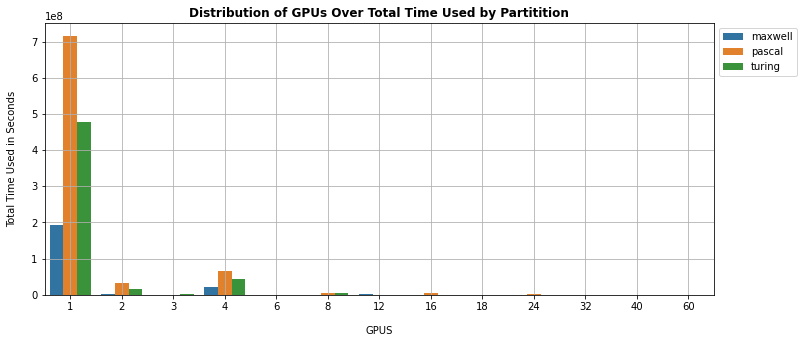

In [67]:
plt.figure(figsize = (12,5))
sns.barplot(data = question2, x='GPUS', y='usedtime_seconds', hue= 'PARTITION')
plt.xlabel("GPUS", labelpad=14)
plt.ylabel("Total Time Used in Seconds", labelpad=14)
plt.title('Distribution of GPUs Over Total Time Used by Partitition', fontweight = 'bold')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.savefig('../accre_project_jolly_ranchers.png', dpi = 150);

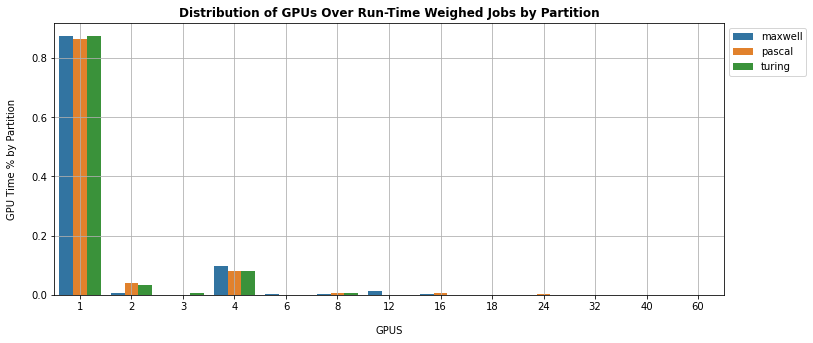

In [68]:
plt.figure(figsize = (12,5))
sns.barplot(data = question2, x='GPUS', y='gpu_time%_bypartition', hue= 'PARTITION')
plt.xlabel("GPUS", labelpad=14)
plt.ylabel("GPU Time % by Partition", labelpad=14)
plt.title('Distribution of GPUs Over Run-Time Weighed Jobs by Partition', fontweight = 'bold')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.savefig('../accre_project_jolly_ranchers.png', dpi = 150);